In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fourier_transform_2D_complex(function):
    
    Nrow = np.size(function, 0) # num rows
    Ncol = np.size(function, 1) # num columns
    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    transform = np.empty(np.shape(function), dtype=np.complex)
    integrand = np.empty(np.shape(function), dtype=np.complex)

    for i in range(0,Nrow):
        for n in range(0,Ncol):
            integrand = function*np.exp(n*(-1j)*XC*2*np.pi/Ncol + i*(-1j)*XR*2*np.pi/Nrow)
            transform[i,n] = sum(sum(integrand))
    
    return transform

In [3]:
def inverse_transform_2D_complex(transformed_function):
    
    Nrow = np.size(transformed_function, 0) # num rows
    Ncol = np.size(transformed_function, 1) # num columns
    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    inverse_transform = np.empty(np.shape(transformed_function), dtype=np.complex)
    integrand = np.empty(np.shape(transformed_function), dtype=np.complex)

    for i in range(0,Nrow):
        for n in range(0,Ncol):
            integrand = transformed_function*np.exp(n*(1j)*XC*2*np.pi/Ncol + i*(1j)*XR*2*np.pi/Nrow)
            inverse_transform[i,n] = sum(sum(integrand))
    
    return inverse_transform

In [4]:
def fourier_transform_2D_trig(function):
    
    Nrow = np.size(function, 0) # num rows
    Ncol = np.size(function, 1) # num columns
    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    transform_a = np.empty(np.shape(function))
    transform_b = np.copy(transform_a)
    integrand_a = np.copy(transform_a)
    integrand_b = np.copy(transform_a)

    for i in range(0,Nrow):
        for n in range(0,Ncol):
            integrand_a = -function*np.sin(n*XC*2*np.pi/Ncol + i*XR*2*np.pi/Nrow)
            integrand_b = function*np.cos(n*XC*2*np.pi/Ncol + i*XR*2*np.pi/Nrow)
            transform_a[i,n] = sum(sum(integrand_a))   
            transform_b[i,n] = sum(sum(integrand_b))   
    
    return transform_a, transform_b

In [5]:
def inverse_transform_2D_trig(imag_transformed_function_values, real_transformed_function_values):
    
    Nrow = np.size(real_transformed_function_values, 0) # num rows
    Ncol = np.size(real_transformed_function_values, 1) # num columns
    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    inverse_transform_a = np.empty(np.shape(real_transformed_function_values))
    inverse_transform_b = np.copy(inverse_transform_a)
    integrand_a = np.copy(inverse_transform_a)
    integrand_b = np.copy(inverse_transform_a)
    inverse_transform = np.copy(inverse_transform_a)
    
    for i in range(0,Nrow):
        for n in range(0,Ncol):
            integrand_a = -imag_transformed_function_values*np.sin(n*XC*2*np.pi/Ncol + i*XR*2*np.pi/Nrow)
            integrand_b = real_transformed_function_values*np.cos(n*XC*2*np.pi/Ncol + i*XR*2*np.pi/Nrow)
            inverse_transform_a[i,n] = sum(sum(integrand_a))   
            inverse_transform_b[i,n] = sum(sum(integrand_b))   
    inverse_transform = inverse_transform_a + inverse_transform_b
    
    return inverse_transform

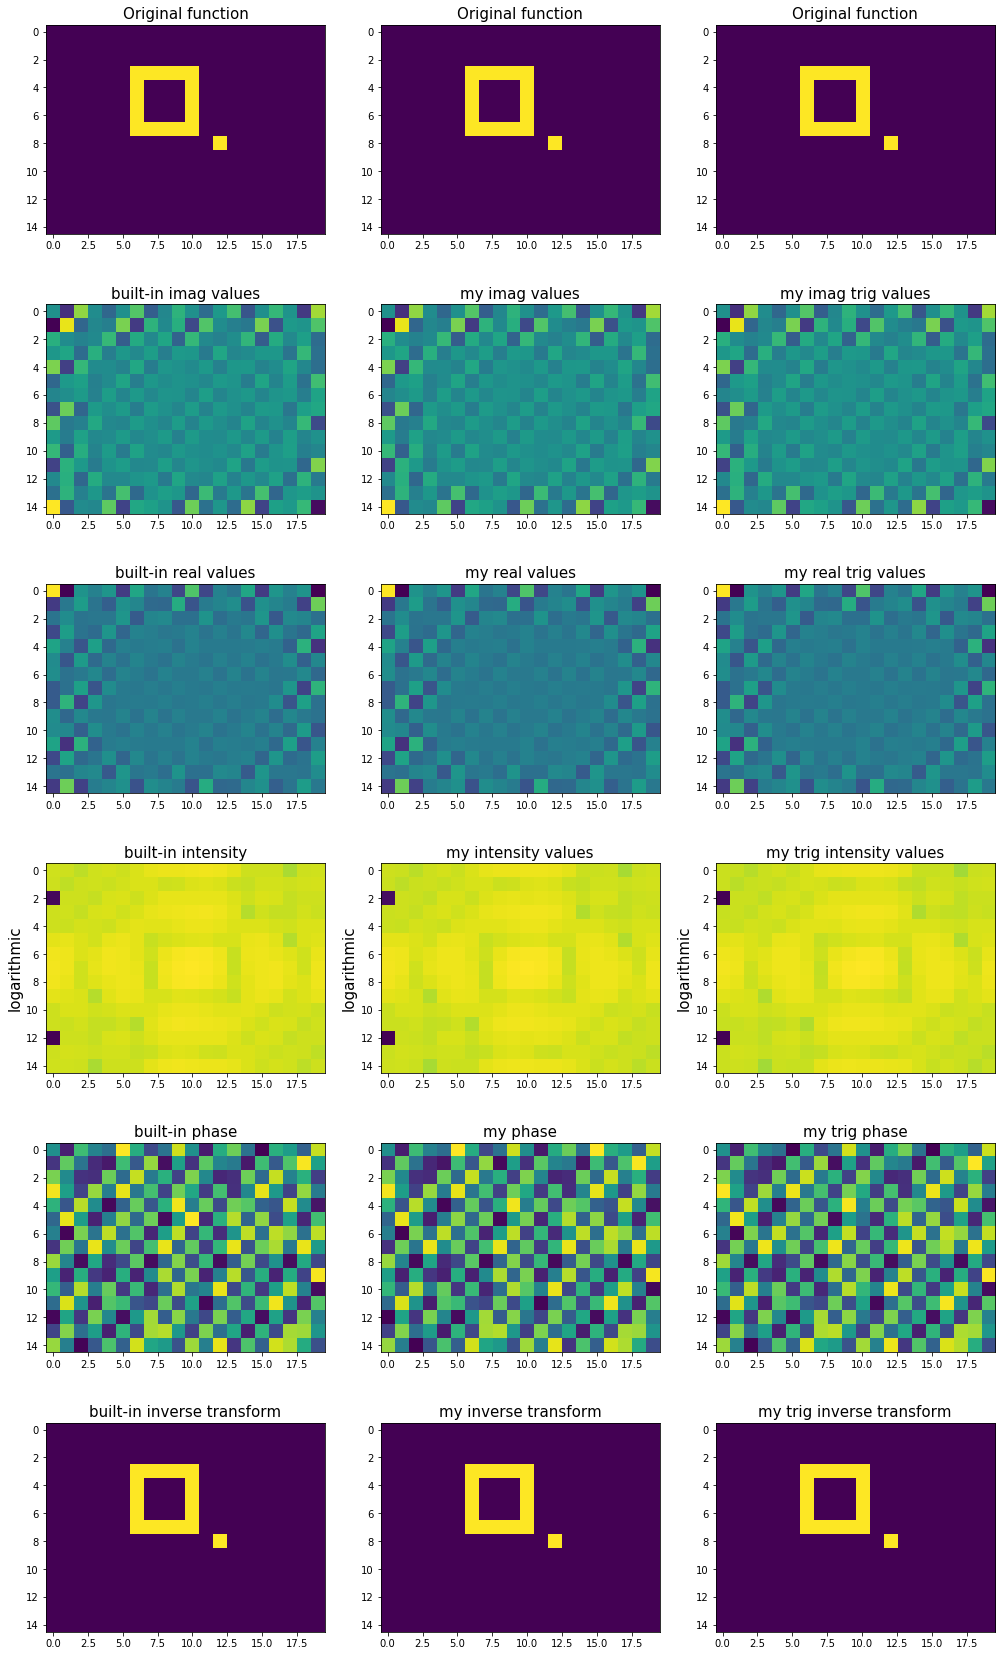

In [6]:
#The next 13 lines or so are setting up the main function
sample_rate = 1
x = np.arange(-2,2,sample_rate)
y = np.arange(-2,1,sample_rate)
X, Y = np.meshgrid(x,y)
Z = np.sin(X*5 + Y*2)

Z = np.zeros((15,20))
Z[3,6:11] = 1
Z[7,6:11] = 1
Z[4:7,6] = 1
Z[4:7,10] = 1
Z[6,10] = 1
Z[8,12] = 1



#Next 7 lines or so are calling/defining the rest of the functions to be plotted.
Zf = np.fft.fft2(Z)
iZf = np.fft.ifft2(Zf)
# kvalues = fourier_transform_frequencies(np.size(Z), sample_rate)
Ztransformed = fourier_transform_2D_complex(Z)
Z_ft_trig_a, Z_ft_trig_b = fourier_transform_2D_trig(Z)
my_complex_inverse = inverse_transform_2D_complex(Ztransformed)
my_trig_inverse = inverse_transform_2D_trig(Z_ft_trig_a, Z_ft_trig_b)


#Below to end of cell is just plotting the functions defined above.
plt.subplots(figsize=(17,30))
plt.subplot(6,3,1)
plt.title('Original function', fontsize=15)
# plt.contourf(Z)
plt.imshow(Z)

plt.subplot(6,3,4)
plt.title('built-in imag values', fontsize=15)
plt.imshow(Zf.imag)

plt.subplot(6,3,7)
plt.title('built-in real values', fontsize=15)
plt.imshow(Zf.real)

plt.subplot(6,3,10)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(Zf))**2))

plt.subplot(6,3,13)
plt.title('built-in phase', fontsize=15)
plt.imshow(np.angle(Zf))

plt.subplot(6,3,16)
plt.title('built-in inverse transform', fontsize=15)
# plt.contourf(iZf.real)
plt.imshow(iZf.real)



plt.subplot(6,3,2)
plt.title('Original function', fontsize=15)
# plt.contourf(Z)
plt.imshow(Z)

plt.subplot(6,3,5)
plt.title('my imag values', fontsize=15)
plt.imshow(Ztransformed.imag)

plt.subplot(6,3,8)
plt.title('my real values', fontsize=15)
plt.imshow(Ztransformed.real)

plt.subplot(6,3,11)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(Ztransformed))**2))

plt.subplot(6,3,14)
plt.title('my phase', fontsize=15)
plt.imshow(np.angle(Ztransformed))

plt.subplot(6,3,17)
plt.title('my inverse transform', fontsize=15)
plt.imshow(my_complex_inverse.real)



plt.subplot(6,3,3)
plt.title('Original function', fontsize=15)
# plt.contourf(Z)
plt.imshow(Z)

plt.subplot(6,3,6)
plt.title('my imag trig values', fontsize=15)
plt.imshow(Z_ft_trig_a)

plt.subplot(6,3,9)
plt.title('my real trig values', fontsize=15)
plt.imshow(Z_ft_trig_b)

plt.subplot(6,3,12)
plt.title('my trig intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.sqrt(Z_ft_trig_a**2 + Z_ft_trig_b**2)))**2))

plt.subplot(6,3,15)
plt.title('my trig phase', fontsize=15)
plt.imshow(np.arctan2(Z_ft_trig_a, Z_ft_trig_b))

plt.subplot(6,3,18)
plt.title('my trig inverse transform', fontsize=15)
plt.imshow(my_trig_inverse)
plt.show()